In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix




from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve




## Loading data 

In [2]:
## creating test dataset which would include the target variable survived from gender_data
gender_data = pd.read_csv('gender_submission.csv')
test_titanic = pd.read_csv('test.csv')

test_titanic.insert(1, 'Survived', gender_data['Survived'])
#after which index nb 1 passenger, name of col, from where

test_titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
## loading train dataset 
## exploration only on train data as it is complete 
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descriptive Analysis

In [ ]:
df.info()

In [ ]:
## checking misssing values
df.isnull().sum() #missing values Age 177,Cabin 687, Embarked 2
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
percent_missing.sort_values(ascending=False, inplace=True) #in descending order 
percent_missing

In [ ]:
## explore unique values for each column
column_names = list(df.columns)
for col in column_names:
    print(col, ':', df[col].nunique(), )

In [ ]:
## explore 'Age'
df['Age'].nunique()
df['Age'].value_counts() 
df['Age'].max() #0.42yo-80yo


In [ ]:
## explore 'SibSp' and 'Pclass
df['SibSp'].value_counts()   #0-5 siblings
df['Parch'].value_counts()   #df['Parch'].value_counts(normalize=True)  for % 
df['Pclass'].value_counts(ascending=True) 



In [ ]:
## explore 'Fare' 
df['Fare'].value_counts()   #0-5 siblings
df['Fare'].max() #512.3292
df['Fare'].min() #0.0

df[df['Fare']==0.0].value_counts()
df[df['Fare']==512.3292].value_counts()

## Correlation Matrix
To check the relationship between independent variables and target variable('Survivor')

In [ ]:
## check for correlation
corr_mat = df.corr(numeric_only=True)
corr_mat

## show correlation using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,annot=True) 

#sex = -0.54 highest negative correlation, survival rate decreases for male
#Pclass = -0.34, the lower the class,
#Fare = 0.26
#embarked = -0.16
#all remaining less 0.1


## Exploring the top 4 correlated variables

In [ ]:
##highest correlated variable

## dataframe of number of survivors according to their gender
sex_survived = df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")
sex_survived = pd.DataFrame(sex_survived)
sex_survived['Percentage'] = round(sex_survived['Count'] *100/ len(df),2)
sex_survived

In [ ]:
## graph of number of survivors according to their gender
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Sex", y = 'Percentage',data=sex_survived, hue='Survived')

ax.set_title('Percentage of survivors by gender')
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(['Female', 'Male'])

plt.show()


In [ ]:
## 2nd highest correlated variable

## dataframe of number of survivors according to their social-economic class
class_survived = df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
class_survived = pd.DataFrame(class_survived)
class_survived['Percentage'] = round(class_survived['Count'] *100/ len(df),2)
class_survived

In [ ]:
## graph of number of survivors according to their social economic class

ax = sns.barplot(x = "Pclass", y = 'Percentage',data=class_survived, hue='Survived')
ax.set_title('Percentage of survivors by social-economic class')
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])

plt.show()



In [ ]:
## 3nd highest correlated variable

## dataframe of number of survivors according to the ticket fare 
fare_survived = df.groupby(["Fare", "Survived"]).size().reset_index(name="Count")
fare_survived = pd.DataFrame(fare_survived)
fare_survived['Percentage'] = round(fare_survived['Count'] *100/ len(df),2)
fare_survived

In [ ]:
## graph of the fare ticket price distribution 
# line starting from mid-bin

plt.figure(figsize=(6, 3))

n, bins, patches = plt.hist(
    x=df["Fare"], 
    bins=50, 
    density=True, 
    alpha=0.2 # faded histogram 
)

# find bin midpoints
bin_centers = 0.5*(bins[1:]+bins[:-1])
# draw lines connecting successive points
plt.plot(bin_centers, n, linewidth=3) 

plt.xlabel("Fare Price", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Distribution of passengers by fare ticket price")

plt.show()

In [ ]:
#talternative graph: to see the starting line better
sns.set(style="darkgrid")
sns.displot(df, x="Fare", kind="kde")
#probability density function

In [ ]:
# boxplot of fare including outliers
sns.boxplot( y=df["Fare"] )
plt.ylabel("Fare Price", labelpad=10)
plt.show()

In [ ]:
# to see the boxplot better by removing outliers
plt.figure(figsize=(8, 3))


sns.boxplot(x = 'Fare', data = df, showfliers = False, showmeans=True,
            meanprops={'marker':'o',                #marking the mean with the 'o' marker in white 
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

plt.xlabel("Fare Price", labelpad=10)
plt.show()


In [ ]:
## 4th highest correlated variable

## dataframe of number of survivors according to their embarkement point  
embark_survived = df.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark_survived = pd.DataFrame(embark_survived)
embark_survived['Percentage'] = round(embark_survived['Count'] *100/ len(df),2)
embark_survived

In [ ]:
## graph of number of survivors according to the embarkment point

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Embarked", y = 'Percentage',data=embark_survived, hue='Survived')

ax.set_title('Percentage of survivors by embarkement point ')
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(['Cherbourg, France', 'Queesntown, Ireland', 'Southampton, UK'], rotation =45)

plt.show()
#highest survival rate from France

## CLeaning the data

In [4]:
## cleaning train data
#dropping 'Name' and 'Ticket' columns which won't help in predicting
df = df.drop(['Name','Ticket'], axis=1)

#dropping 'Cabin' column because 77% of the data is missing
df = df.drop('Cabin', axis=1)

#assign mean age to missing values in 'Age' and 'Fare'
df['Age'].fillna(int(df['Age'].median()), inplace=True)
df['Fare'].fillna(int(df['Fare'].median()), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

#turn 'Age' float to integer 
df['Age'] = df['Age'].astype(int) #hence the minimum age 0.42 will become 0

#dropping the 2 rows that are missing in 'Embarked'
df.dropna(subset=['Embarked']) 



/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_57019/739800839.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Embarked'].fillna(int(df['Embarked'].mode()), inplace=True)


ValueError: invalid literal for int() with base 10: 'S'

In [6]:
## cleaning test data
#dropping 'Name' and 'Ticket' columns which won't help in predicting
test_titanic = test_titanic.drop(['Name','Ticket'], axis=1)

#dropping 'Cabin' column because 77% of the data is missing
test_titanic = test_titanic.drop('Cabin', axis=1)

#assign mean age to missing values in 'Age' and 'Fare
test_titanic['Age'].fillna(int(test_titanic['Age'].median()), inplace=True)
test_titanic['Fare'].fillna(int(test_titanic['Fare'].median()), inplace=True)
test_titanic['Embarked'].fillna(test_titanic['Embarked'].mode(), inplace=True)

#turn 'Age' float to integer 
test_titanic['Age'] = test_titanic['Age'].astype(int) #hence the minimum age 0.42 will become 0

#dropping the 2 rows that are missing in 'Embarked'
test_titanic.dropna(subset=['Embarked']) 

test_titanic


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34,0,0,7.8292,Q
1,893,1,3,female,47,1,0,7.0000,S
2,894,0,2,male,62,0,0,9.6875,Q
3,895,0,3,male,27,0,0,8.6625,S
4,896,1,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27,0,0,8.0500,S
414,1306,1,1,female,39,0,0,108.9000,C
415,1307,0,3,male,38,0,0,7.2500,S
416,1308,0,3,male,27,0,0,8.0500,S


In [26]:
#check if there are still missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
#checking dataset after cleaning, 
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


## Cleaning - next: to encode 'Sex' & 'Embarked' 

encode 'Sex' & 'Embarked' to turn categorical data into numeric data for the model


In [12]:
#one-hot encoder for 'Sex','Embarked' and replace it in the train data
le_sex = preprocessing.LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = preprocessing.LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [13]:
#one-hot encoder for 'Sex','Embarked' and replace it in the test data
le_sex = preprocessing.LabelEncoder()
test_titanic['Sex'] = le_sex.fit_transform(test_titanic['Sex'])

le_embarked = preprocessing.LabelEncoder()
test_titanic['Embarked'] = le_embarked.fit_transform(test_titanic['Embarked'])

test_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34,0,0,7.8292,1
1,893,1,3,0,47,1,0,7.0000,2
2,894,0,2,1,62,0,0,9.6875,1
3,895,0,3,1,27,0,0,8.6625,2
4,896,1,3,0,22,1,1,12.2875,2


In [ ]:
#quick distribution of train data
df.hist(bins=10, figsize=(10,10), color= 'teal')
plt.show

In [ ]:
#quick distribution of test data
test_titanic.hist(bins=10, figsize=(10,10), color= 'teal')
plt.show

## Splitting the data into train and test

In [14]:
combined_titanic_data= pd.concat([df, test_titanic], axis=0, ignore_index=True) 
combined_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   int64  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 92.2 KB


In [15]:
# selecting features in X and target variable in y
X = combined_titanic_data.drop('Survived', axis=1)
y = combined_titanic_data['Survived']

In [16]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22,1,0,7.2500,2
1,2,1,0,38,1,0,71.2833,0
2,3,3,0,26,0,0,7.9250,2
3,4,1,0,35,1,0,53.1000,2
4,5,3,1,35,0,0,8.0500,2


In [17]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
## train the model, based on 80% test size and 20% for training
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2, random_state=32)

print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', y_train.shape)
print('Y_test size is:', y_test.shape)

X_train size is: (1047, 8)
X_test size is: (262, 8)
Y_train size is: (1047,)
Y_test size is: (262,)


In [19]:
## standardisation
# input data is transformed to have a mean of zero and a std of 1 
scaler_x = StandardScaler() #create object 
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test) 

# split dataset and selecting dependent and independent variables,
# cabin, name, ticket variables are both dropped
X_train = df.drop(['Survived','Sex','Embarked','Age','Fare'], axis= 1) #all features except 'survived' variable: independent variables
y_train = df['Survived'] #the target variable: dependent variable; pd.series

X_test = test_titanic.drop(['Survived','Sex','Embarked','Age','Fare'], axis= 1)
y_test = test_titanic['Survived']

In [20]:
## build logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
## make prediction
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [22]:
#get result in df
result= {'Actual' : y_test, 'Predicted' : y_pred}
result_df = pd.DataFrame(result)
result_df.head()

,Actual,Predicted
872,0,0
270,0,0
987,1,1
1214,0,0
113,0,1


In [23]:
# check accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8435114503816794


In [27]:
## classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       156
           1       0.83      0.77      0.80       106

    accuracy                           0.84       262
   macro avg       0.84      0.83      0.84       262
weighted avg       0.84      0.84      0.84       262



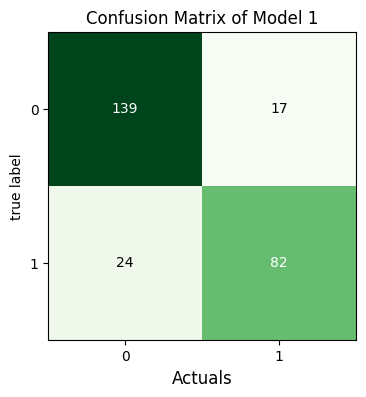

In [24]:
#confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

fig, ax = plot_confusion_matrix(conf_mat = conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.xlabel('Actuals', fontsize = 12 )
plt.title('Confusion Matrix of Model 1', fontsize = 12 )
plt.show()

AUC: 0.832305


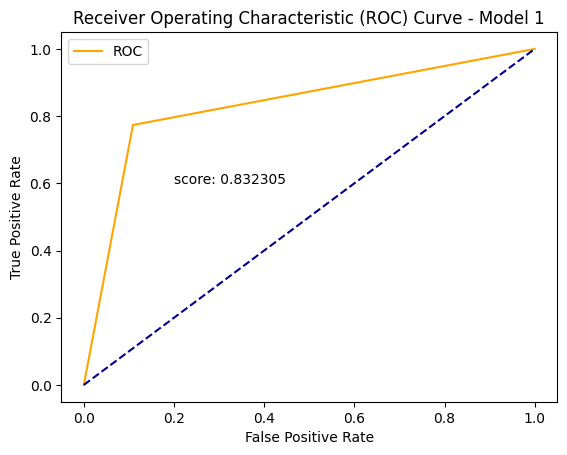

In [25]:
## CALCULATE AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 1')
plt.text(y= 0.6, x=0.2, s=f'score: {round(auc,6)}')
plt.legend()
plt.show()

## Conclusion 

Our logistic regression model's accuracy is at 84%. There are room for improvement therefore there could be further cleaning such
as converting ages into classes.